# 6.2 Exploring Relationships

### This script contains the following:

#### 1. Importing Visualization Libraries and Data
#### 2. Exploring Relationships
     Correlations
     Scatterplots
     Pair Plots
     Categorical Plots
#### 3. Questions & Hypotheses

#### 1. Importing Visualization Libraries and Data


In [6]:
#Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [7]:
# Load the Excel file into a DataFrame
file_path = r'C:\Users\north\10-2024 Exploring Chocolate Bar Quality\02 Data\Prepared Data' 
df_cacao = pd.read_csv(os.path.join(file_path, 'cleaned_flavors_of_cacao.csv'))

In [8]:
# View the first few rows
df_cacao.head(10)

,Company,Bean Origin,Reference,Review Date,Cocoa Percent,Company Location,Rating,Bean Type,Broad Bean Origin
0,A. Morin,Agua Grande,1876.0,2016,0.63,France,3.75,Unknown,Sao Tome
1,A. Morin,Kpime,1676.0,2015,0.70,France,2.75,Unknown,Togo
2,A. Morin,Atsane,1676.0,2015,0.70,France,3.00,Unknown,Togo
3,A. Morin,Akata,1680.0,2015,0.70,France,3.50,Unknown,Togo
4,A. Morin,Quilla,1704.0,2015,0.70,France,3.50,Unknown,Peru
5,A. Morin,Carenero,1315.0,2014,0.70,France,2.75,Criollo,Venezuela
6,A. Morin,Cuba,1315.0,2014,0.70,France,3.50,Unknown,Cuba
7,A. Morin,Sur del Lago,1315.0,2014,0.70,France,3.50,Criollo,Venezuela
8,A. Morin,Puerto Cabello,1319.0,2014,0.70,France,3.75,Criollo,Venezuela
9,A. Morin,Pablino,1319.0,2014,0.70,France,4.00,Unknown,Peru


In [9]:
df_cacao.dtypes

Company               object
Bean Origin           object
Reference            float64
Review Date            int64
Cocoa Percent        float64
Company Location      object
Rating               float64
Bean Type             object
Broad Bean Origin     object
dtype: object

#### 2. Exploring Relationships

##### Correlations

In [12]:
#Create a correlation matrix using pandas
#Select only the numerical columns from the DataFrame to avoid errors
numerical_columns = df_cacao.select_dtypes(include=['int', 'float'])

numerical_columns.corr()

,Reference,Review Date,Cocoa Percent,Rating
Reference,1.000000,0.985070,0.010493,0.099328
Review Date,0.985070,1.000000,0.010751,0.097749
Cocoa Percent,0.010493,0.010751,1.000000,-0.044998
Rating,0.099328,0.097749,-0.044998,1.000000


In [13]:
# Discard "Reference" since it has limited impact on the analysis, and its information is largely captured by "Review Date."
# Check if 'Reference' exists in the numerical_columns DataFrame before attempting to drop it

if 'Reference' in numerical_columns.columns:
    numerical_columns = numerical_columns.drop('Reference', axis=1)

# Display the remaining columns
numerical_columns.columns


Index(['Review Date', 'Cocoa Percent', 'Rating'], dtype='object')

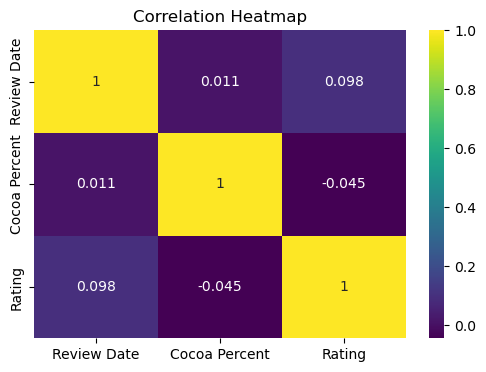

In [14]:
# Assume 'numerical_columns' is your DataFrame with numerical data to plot
correlation_matrix = numerical_columns.corr()

# Plotting a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap="viridis", cbar=True)
plt.title('Correlation Heatmap')

# Save figure
save_path = r"C:\Users\north\10-2024 Exploring Chocolate Bar Quality\04 Analysis\Visualizations"
file_name = "corr.png"
full_path = f"{save_path}\\{file_name}"  # Combine path and filename

plt.savefig(full_path, format='png', dpi=300, bbox_inches='tight')  # Save with bounding box to ensure visibility
plt.show()  # Display the plot to verify it's created correctly
plt.close()  # Close the plot to free up memory


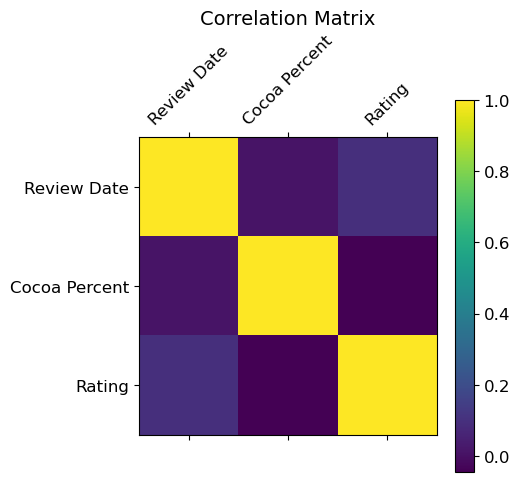

In [15]:
# Create a correlation heatmap using the original 'numerical_columns'
plt.matshow(numerical_columns.corr())  # Using the original numerical columns for correlation
plt.xticks(range(numerical_columns.shape[1]), numerical_columns.columns, fontsize=12, rotation=45)  # X-axis labels
plt.yticks(range(numerical_columns.shape[1]), numerical_columns.columns, fontsize=12)  # Y-axis labels
cb = plt.colorbar()  # Add color legend (colorbar)
cb.ax.tick_params(labelsize=12)  # Set font size for colorbar labels
plt.title('Correlation Matrix', fontsize=14)  # Add title
plt.show()


The heatmap provides a visual representation of the correlation coefficients between three numerical variables: Review Date, Cocoa Percent, and Rating. 

*Yellow Color (close to +1): indicates a strong positive relationship
Purple Color (close to -1): represents a strong negative correlation - the darker the shade of purple, the more negative the correlation
Greenish to blue hues (close to 0): Represent weak or no correlation. Cells in this color range indicate that there is little to no linear relationship between the variables*

**Review Date vs. Cocoa Percent:** Very weak positive correlation, indicating no significant relationship between when the chocolate was reviewed and its cocoa content.

**Review Date vs. Rating:** Weak positive correlation, suggesting that ratings have slightly increased over time, but the effect is minimal.

**Cocoa Percent vs. Rating:** Very weak negative correlation, indicating that there is almost no relationship between the cocoa percentage and the chocolate rating.
Overall, the weak correlations across these variables suggest that other factors (possibly non-numerical or more complex) may play a larger role in influencing chocolate ratings.


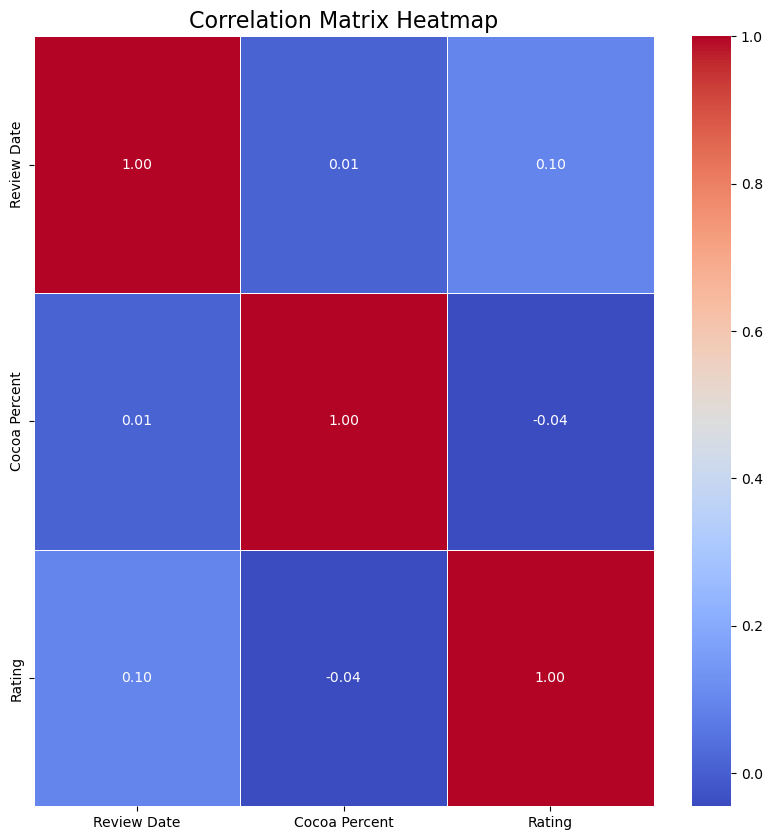

In [17]:
# Example data for the correlation matrix (replace with your actual data)
correlation_matrix = numerical_columns.corr()

# Create a subplot with matplotlib
fig, ax = plt.subplots(figsize=(10, 10))  # Adjust the size as needed

# Create the correlation heatmap in seaborn
sns.heatmap(correlation_matrix, annot=True, ax=ax, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Add a title
ax.set_title('Correlation Matrix Heatmap', fontsize=16)

# Show the plot
plt.show()

# Save figure
save_path = r"C:\Users\north\10-2024 Exploring Chocolate Bar Quality\04 Analysis\Visualizations"
file_name = "heatmap.png"
full_path = f"{save_path}\\{file_name}"  # Combine path and filename

fig.savefig(full_path, format='png', dpi=300, bbox_inches='tight')  # Save with bounding box to ensure visibility
plt.close()  # Close the plot to free up memory


*Red Cells: Strong positive correlation (+1). The diagonal cells are deep red, indicating that each variable correlates perfectly with itself.
Blue Cells: Weak or near-zero correlation (0.0). Most of the off-diagonal cells have blue shades, representing weak or nonexistent linear relationships between the variables.
Color Gradient: The color gradient on the side indicates the range from strong negative correlation (dark blue) to strong positive correlation (deep red).*


**Both heatmaps consistently show that:**

- There is no significant linear relationship between the year a chocolate was reviewed (Review Date) and its cocoa content or rating.
- The cocoa percentage (Cocoa Percent) does not have a meaningful impact on the chocolate's rating.
- The correlations between the variables are very weak, suggesting other factors might play a more prominent role in determining chocolate ratings.
The key takeaway is that none of these numerical variables show strong correlations, indicating that other factors (potentially categorical ones) might influence the chocolate ratings more significantly.

##### Scatterplots

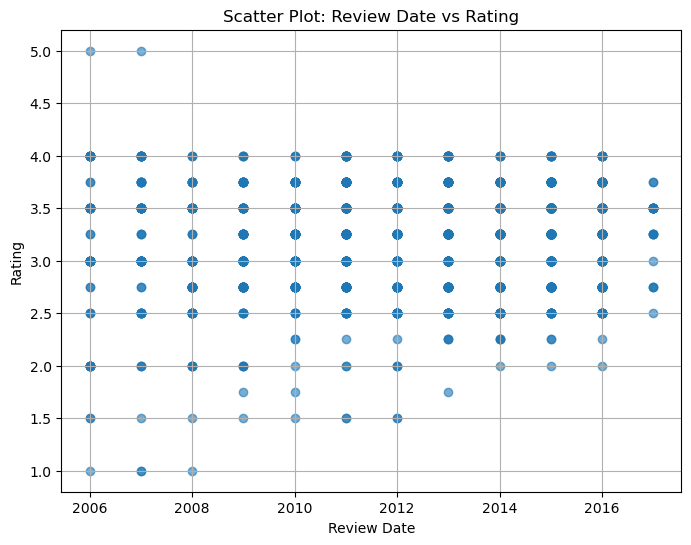

In [20]:
# Scatter plot for Review Date vs Rating
plt.figure(figsize=(8, 6))
plt.scatter(numerical_columns['Review Date'], numerical_columns['Rating'], alpha=0.6)
plt.title('Scatter Plot: Review Date vs Rating')
plt.xlabel('Review Date')
plt.ylabel('Rating')
plt.grid(True)

# Define path and save the figure
save_path = r"C:\Users\north\10-2024 Exploring Chocolate Bar Quality\04 Analysis\Visualizations"
file_name = "scatterplot_review_date_vs_rating.png"
full_path = f"{save_path}\\{file_name}"

# Save and display the plot
plt.savefig(full_path, format='png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()


The scatter plot shows the relationship between the year a chocolate was reviewed (x-axis) and its rating (y-axis).

- The dots in the scatter plot appear to be randomly spread out, with no obvious upward or downward trend. This indicates that chocolate ratings do not strongly depend on when they were reviewed.
- Even though the correlation between the review date and the rating was slightly positive (0.10), the scatter plot confirms that this relationship is weak. In simpler terms, chocolates reviewed in recent years are not consistently rated higher or lower than those reviewed in earlier years. This suggests that the factors influencing chocolate ratings are likely unrelated to the year of review.t.show()


##### Pair Plots

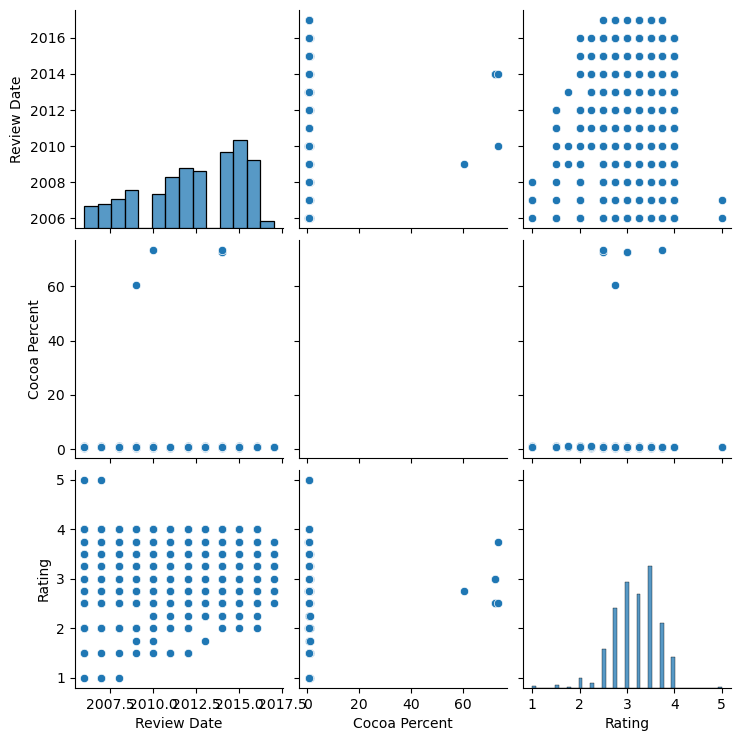

In [23]:
# Create pair plot
sns_plot = sns.pairplot(numerical_columns)
plt.show()  # Display the plot to verify

# Save the pair plot
save_path = r"C:\Users\north\10-2024 Exploring Chocolate Bar Quality\04 Analysis\Visualizations"
file_name = "pairplot_numerical_columns.png"
full_path = f"{save_path}\\{file_name}"  # Combine path and filename

sns_plot.savefig(full_path, format='png', dpi=300, bbox_inches='tight')  # Save with high quality
plt.close()  # Close the plot to free up memory


- The scatter plots between different variables (e.g., Review Date vs. Cocoa Percent, Cocoa Percent vs. Rating) show dots scattered in a way that doesn’t indicate any clear trend or relationship. This suggests that changes in one variable do not significantly affect the others.
- The histograms along the diagonal show how each variable is distributed. For example, the histogram for Cocoa Percent might show that most chocolates have a cocoa content around 70%, which is quite common in the chocolate market.
- The scatter plots reaffirm the earlier findings that there aren't strong linear relationships between these numerical variables. For instance, increasing the cocoa percentage doesn't seem to directly lead to higher or lower ratings.
- The histograms give us additional insight into how the data is spread. For example, if the Rating histogram shows most chocolates cluster around a specific rating, it could indicate a general standard of chocolate quality in the dataset.


##### Categorical Plots

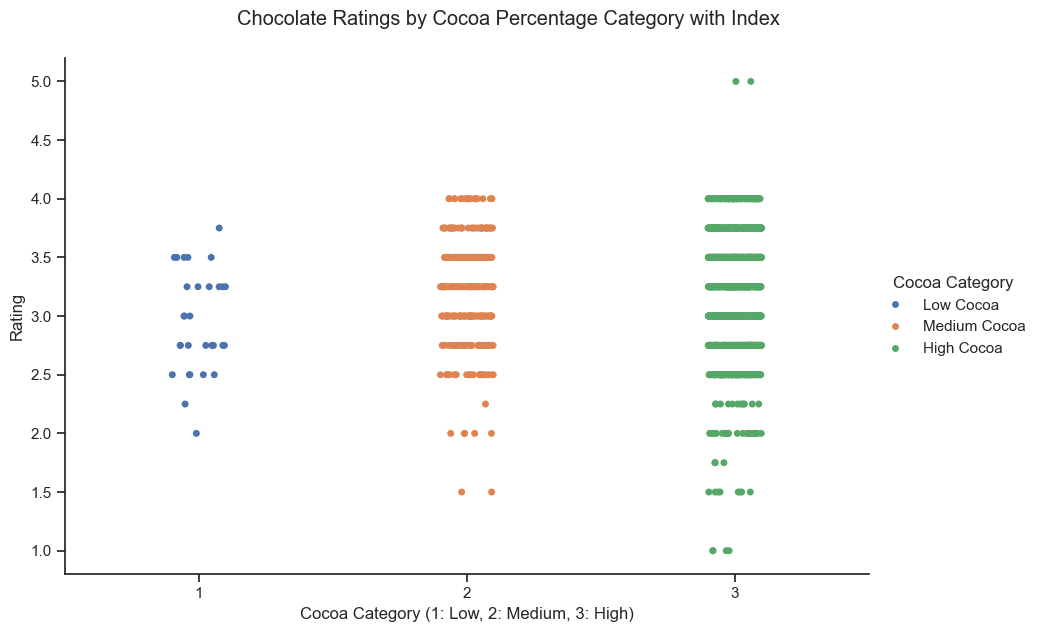

In [26]:
# Step 1: Define cocoa category order for the index column
cocoa_order = {'Low Cocoa': 1, 'Medium Cocoa': 2, 'High Cocoa': 3}

# Step 2: Function to categorize cocoa percentage
def categorize_cocoa(cocoa_percent):
    if cocoa_percent < 0.6:
        return 'Low Cocoa'
    elif 0.6 <= cocoa_percent < 0.7:
        return 'Medium Cocoa'
    else:
        return 'High Cocoa'

# Apply categorization to create new columns
df_cacao['Cocoa Category'] = df_cacao['Cocoa Percent'].apply(categorize_cocoa)
df_cacao['Cocoa Index'] = df_cacao['Cocoa Category'].map(cocoa_order)

# Step 3: Create the categorical plot using Seaborn's catplot
sns.set(style="ticks")
catplot = sns.catplot(
    x='Cocoa Index', y='Rating', hue='Cocoa Category',
    data=df_cacao, kind='strip', jitter=True, height=6, aspect=1.5
)

# Customize plot with labels and title
catplot.set_axis_labels("Cocoa Category (1: Low, 2: Medium, 3: High)", "Rating")
catplot.fig.suptitle("Chocolate Ratings by Cocoa Percentage Category with Index", y=1.05)

# Define the save path
save_path = r"C:\Users\north\10-2024 Exploring Chocolate Bar Quality\04 Analysis\Visualizations"
file_name = "categoricalplots.png"
full_path = f"{save_path}\\{file_name}"

# Save the plot using the Seaborn object
catplot.savefig(full_path, format='png', dpi=300, bbox_inches='tight')
plt.show()  # Display to verify
plt.close()  # Close to free up memory




The plot shows chocolate ratings distributed across three different cocoa content categories:

- 1 (Low Cocoa): Cocoa content less than 60%.
- 2 (Medium Cocoa): Cocoa content between 60% and 75%.
- 3 (High Cocoa): Cocoa content above 75%.

No matter how much cocoa is in the chocolate—whether it’s low, medium, or high—most chocolates get ratings around 3 to 3.5. This suggests that the cocoa content alone doesn’t seem to make a chocolate much better or worse in the eyes of the reviewers. Other factors like brand, might be influencing the ratings more than just the cocoa percentage.


#### 3. Questions and Hypotheses

**Q: How are chocolate bar ratings distributed?**

A: Chocolate ratings tend to cluster around the 3 to 3.5 range. Most chocolates are rated as average or slightly above average, with few ratings falling into the very high (4.5 to 5) or very low (1 to 2) ranges. This suggests that most chocolates are perceived to be of moderate quality.

**Q: Have chocolate ratings changed over the years?**

A: There is a very weak positive correlation (0.10) between the review date and chocolate ratings, suggesting a slight increase in ratings over the years. However, the trend is not strong, indicating that ratings have generally remained stable over time.

**Q: Is there a link between cocoa content and higher ratings?**

A: There is almost no linear relationship between cocoa content and chocolate ratings. The correlation coefficient between "Cocoa Percent" and "Rating" was close to zero (-0.04), indicating that the amount of cocoa in the chocolate does not significantly affect its rating.

**Q: How do ratings vary by cocoa percentage?**

A: When I categorized chocolates into "Low Cocoa," "Medium Cocoa," and "High Cocoa," I found that ratings in all categories generally cluster around the 3 to 3.5 mark. There is no clear evidence that one cocoa category consistently receives higher or lower ratings than the others.

**Q: What characteristics define the highest and lowest-rated chocolates?**

A: Based on the cocoa content analysis, cocoa percentage does not appear to define the highest or lowest-rated chocolates. Most ratings, regardless of cocoa content, are around the 3 to 3.5 mark. Further analysis is required to explore other factors like "Company," "Bean Origin," or "Bean Type" to identify any patterns for the highest and lowest ratings.

***New Questions Based on Findings***
- Why do most chocolate ratings cluster around 3 to 3.5? Is there a standard quality level that most chocolates meet, leading to this average rating? Further analysis could focus on exploring specific features (e.g., company, bean origin) that might influence this clustering.

- Are there specific flavor notes or bean processing methods that could correlate with higher ratings? This could be explored by diving deeper into any descriptive or qualitative data available in the dataset (if any).

- How does the distribution of ratings vary within different cocoa categories for each region or company? This could help identify if certain regions or companies excel at specific cocoa content levels.

***Hypotheses***
- Cocoa content does not significantly affect the rating of chocolate bars.

- Chocolate ratings have remained relatively stable over time.

- Certain companies consistently produce higher-rated chocolates compared to others.

- Chocolates from specific regions (bean origin) receive higher ratings on average